<a href="https://colab.research.google.com/github/vyom-verma/DL_model_cancer_prediction/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
import seaborn as sns
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Cancer_Data.csv')

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [375]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
510,91550,B,11.740,14.69,76.31,426.0,0.08099,0.09661,0.067260,0.026390,...,17.60,81.25,473.8,0.10730,0.27930,0.26900,0.10560,0.2604,0.09879,NaN
325,89511502,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.021070,...,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888,NaN
373,901288,M,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.089410,...,23.17,166.80,1946.0,0.15620,0.30550,0.41590,0.21120,0.2689,0.07055,NaN
262,888570,M,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,...,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484,NaN
79,8610908,B,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,...,24.82,91.88,622.1,0.12890,0.21410,0.17310,0.07926,0.2779,0.07918,NaN
341,898143,B,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,...,23.07,71.25,353.6,0.12330,0.34160,0.43410,0.08120,0.2982,0.09825,NaN
506,91544001,B,12.220,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.021660,...,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839,NaN
232,88203002,B,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,NaN
99,862548,M,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,...,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,NaN
242,883852,B,11.300,18.19,73.93,389.4,0.09592,0.13250,0.154800,0.028540,...,27.96,87.16,472.9,0.13470,0.48480,0.74360,0.12180,0.3308,0.12970,NaN


dropping columns which dont have relevant trianing parameters

In [376]:
X=df.drop(columns=['id','diagnosis','Unnamed: 32'])
y=df['diagnosis']
X.shape




(569, 30)

##labelling

In [377]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)


LabelEncoder()

In [378]:
y=le.transform(y)

In [379]:
y=pd.DataFrame(y)
y.sample(10)

,0
383,0
251,0
300,1
447,0
145,0
26,1
356,0
414,1
533,1
309,0


## Train test split

In [380]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [381]:
X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.51790,0.21130,0.2480,0.08999
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.3966,0.33810,0.15210,0.3651,0.11830
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.015020,0.020880,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113
221,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.2698,0.25770,0.09090,0.3065,0.08177
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.2310,0.06343,...,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.72420,0.24930,0.4670,0.10380
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.029480,0.015140,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.1542,0.12770,0.06560,0.3174,0.08524
523,13.710,18.68,88.73,571.0,0.09916,0.10700,0.053850,0.037830,0.1714,0.06843,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031


In [382]:
X_test.shape

(114, 30)

In [383]:
y_test.shape

(114, 1)

##StandardScaler

In [384]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [385]:
X_train_scaled

array([[ 1.83564762,  0.44455114,  1.89081144, ...,  1.49204089,
        -0.69200834,  0.3480351 ],
       [-0.09329577,  1.20360662,  0.01095628, ...,  0.58660635,
         1.2508784 ,  1.91835991],
       [-0.07904951, -0.73023319, -0.14655962, ..., -0.88992491,
        -0.88779026, -0.69810852],
       ...,
       [-1.27659   , -0.19772657, -1.26405434, ..., -0.7363681 ,
         0.45945485,  0.08455778],
       [-0.12463754, -0.15335102, -0.13787764, ...,  0.22412665,
        -0.07977503,  0.36578515],
       [-1.1589159 , -0.98714428, -1.17020628, ..., -1.58031874,
         0.05959516, -0.3741701 ]])

In [386]:
X_scaled=pd.DataFrame(X_train_scaled , columns=X_train.columns)

before scaling

<Axes: xlabel='area_mean', ylabel='Density'>

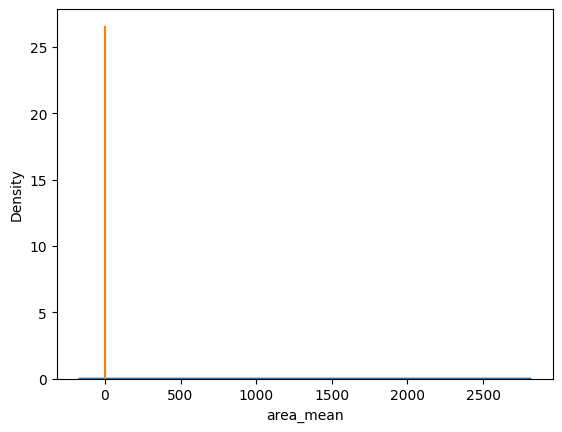

In [387]:
sns.kdeplot(X_train['area_mean'])
sns.kdeplot(X_train['smoothness_mean'])

after scaling

<Axes: xlabel='area_mean', ylabel='Density'>

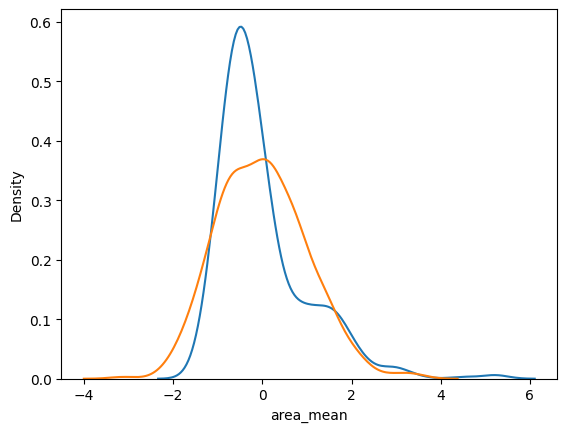

In [388]:
sns.kdeplot(X_scaled['area_mean'])
sns.kdeplot(X_scaled['smoothness_mean'])

##Model building

In [389]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [390]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=30))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [391]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                310       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 8)                 88        
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [392]:
history=model.fit(X_train_scaled,y_train,epochs=25, verbose=False, validation_data=(X_test_scaled,y_test) ,batch_size=32)

In [393]:
y_log=model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


In [394]:
y_pred=np.where(y_log>0.5,1,0)
y_pred=pd.DataFrame(y_pred)

#model testing

In [395]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824561403508771

##Training and Validation loss

Text(0.5, 1.0, 'Training and Validation loss')

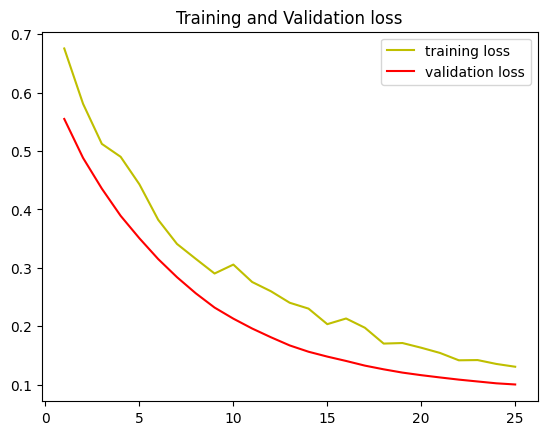

In [396]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'y', label='training loss')
plt.plot(epochs,val_loss,'r' , label='validation loss')
plt.legend()
plt.title('Training and Validation loss')

##Training and Validation Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

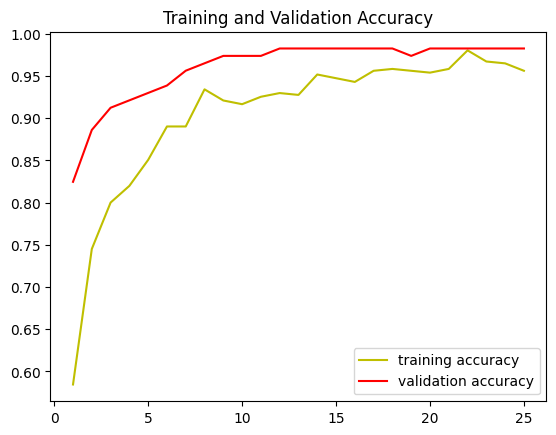

In [397]:
import matplotlib.pyplot as plt
a=history.history['accuracy']
val_a=history.history['val_accuracy']
epochs=range(1,len(loss)+1)

plt.plot(epochs,a,'y' , label='training accuracy')
plt.plot(epochs,val_a,'r' , label='validation accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


## checking accuracy on trained model

In [398]:

df=df.sample(100)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
267,8910499,B,13.590,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,...,30.04,97.66,661.5,0.1005,0.17300,0.145300,0.061890,0.2446,0.07024,NaN
315,894089,B,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,...,19.71,84.48,544.2,0.1104,0.04953,0.019380,0.027840,0.1917,0.06174,NaN
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,...,25.72,82.98,516.5,0.1085,0.08615,0.055230,0.037150,0.2433,0.06563,NaN
453,911201,B,14.530,13.98,93.86,644.2,0.10990,0.09242,0.068950,0.064950,...,16.93,103.10,749.9,0.1347,0.14780,0.137300,0.106900,0.2606,0.07810,NaN
379,9013838,M,11.080,18.83,73.30,361.6,0.12160,0.21540,0.168900,0.063670,...,32.82,91.76,508.1,0.2184,0.93790,0.840200,0.252400,0.4154,0.14030,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,899667,M,15.750,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.124200,...,24.17,119.40,915.3,0.1550,0.50460,0.687200,0.213500,0.4245,0.10500,NaN
370,9012315,M,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,...,31.03,129.30,1165.0,0.1415,0.46650,0.708700,0.224800,0.4824,0.09614,NaN
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.037360,...,27.27,105.90,733.5,0.1026,0.31710,0.366200,0.110500,0.2258,0.08004,NaN
285,8912521,B,12.580,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,...,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431,NaN


In [399]:
a=df.drop(columns=['id','diagnosis','Unnamed: 32'])
b=df['diagnosis']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(b)
b=le.transform(b)
b=pd.DataFrame(b)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
a=scaler.fit_transform(a)




4/4 [==============================] - 0s 5ms/step


<ipython-input-400-643330a14a66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b_test)


<Axes: ylabel='Density'>

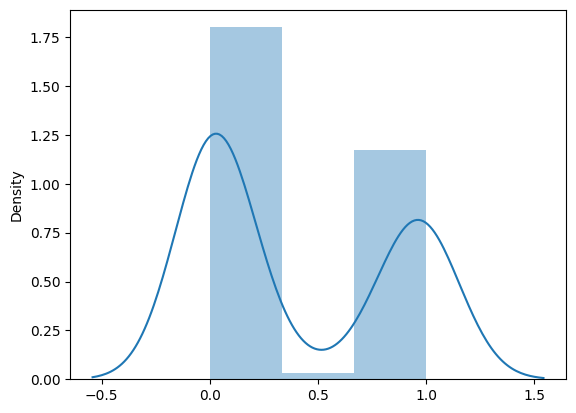

In [400]:
b_test=model.predict(a)
b_test
import seaborn as sns
sns.distplot(b_test)

In [401]:
b_test=np.where(b_test>0.5,1,0)
b_test=pd.DataFrame(b_test)

In [402]:
from sklearn.metrics import accuracy_score
accuracy_score(b,b_test  )

0.97